<h2 align="center"> Logistic Regression </h2>

### Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
df=pd.read_csv('DMV_Written_Tests.csv')

In [4]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores = df[['DMV_Test_1','DMV_Test_2']].values
results = df['Results'].values

### Visualize the Data
---

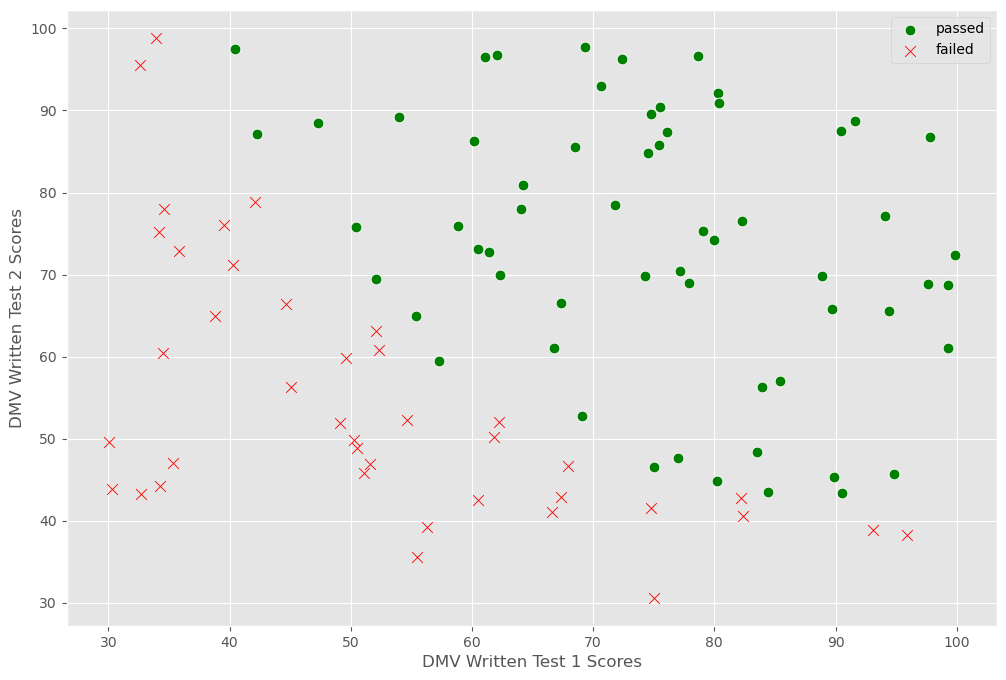

In [7]:
passed =(results == 1).reshape(100,1)
failed = (results == 0).reshape(100, 1)
ax = sns.scatterplot(x = scores [passed[:, 0], 0],
                     y = scores [passed[:, 0], 1], 
                     marker = 'o',
                     color= 'green',
                     s=60)
sns.scatterplot(x = scores [failed[:, 0], 0],
                y = scores [failed[:, 0], 1], 
                marker = 'x',
                color= 'red',
                s=60)
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(['passed','failed'])
plt.show()

###  Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [8]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [9]:
z=np.arange(-10,10)
y=sigmoid(z)
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

### Task 5: Compute the Cost Function J and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{w}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{w}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{w}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [10]:
def compute_cost(w,x,y):
    m=len(x)
    y_predict = sigmoid(np.dot(x,w))
    error = (y*np.log(y_predict)+(1-y)*np.log(1-y_predict))
    j=-1/m*sum(error)
    gradient = (1/m)*np.dot(x.transpose(),(y_predict-y))
    return j[0],gradient
 

Here:
        
        X is an 𝑚×𝑛
        m×n matrix (m = number of samples, n = number of features).
        
        (h - y) is an 𝑚×1
        m×1 vector (errors).
        
        To multiply properly, we need to transpose X into an 𝑛×𝑚
        so that:             
$$(h_{w}(x^{(i)}) - y^{(i)})x_j^{(i)}⇒(n×m)⋅(m×1)=(n×1)$$
        
        This gives the gradient for each parameter.

### Cost and Gradient at Initialization
---

In [11]:
mean_scores= np.mean(scores, axis=0)
std_scores =np.std(scores, axis=0)

scores= (scores- mean_scores) / std_scores

rows = scores.shape[0]
cols =scores.shape[1]

X= np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape (rows, 1)

w_init = np.zeros((cols + 1, 1))


In [12]:
cost,gradient =compute_cost(w_init, X, y)

print("Cost at initialization", cost)
print("Gradients at initialization",gradient)

Cost at initialization 0.693147180559946
Gradients at initialization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent
---

Minimize the cost function $J(w)$ by updating the below equation and repeat until convergence
$w_j := w_j - \alpha \frac{\partial J(w)}{\partial w_j}$ (simultaneously update $w_j$ for all $j$)

In [13]:
def gradient_decent(x,y,w,no_itr,alpha):
    costs=[]
    for i in range(no_itr):
        cost,gradient=compute_cost(w,x,y)
        w=w-(alpha*gradient)
        costs.append(cost)
    return costs,w

In [14]:
costs,w=gradient_decent(X,y,w_init,200,1)

### Plotting the Convergence of $J(w)$
---

Plot $J(w)$ against the number of iterations of gradient descent:

In [15]:
costs

[0.693147180559946,
 0.5594032425456549,
 0.4805876648533871,
 0.43046342235936136,
 0.3960564700549831,
 0.3709669278894235,
 0.35181143821554695,
 0.33666258234791696,
 0.3243484792498155,
 0.3141169879977175,
 0.3054632898746155,
 0.2980357306412133,
 0.2915815830756159,
 0.28591434088214984,
 0.2808932044202074,
 0.27640976797974876,
 0.27237912064657627,
 0.2687337409240407,
 0.2654192108626502,
 0.2623911455046634,
 0.25961295257859074,
 0.25705417096290983,
 0.2546892200293839,
 0.25249644553195266,
 0.25045738276072227,
 0.24855618107480795,
 0.2467791498207655,
 0.2451143966177867,
 0.2435515366834565,
 0.24208145734126263,
 0.24069612578706712,
 0.23938843105923613,
 0.23815205326945038,
 0.2369813547234468,
 0.2358712887425202,
 0.23481732289271778,
 0.23381537401406835,
 0.2328617529706419,
 0.23195311745280284,
 0.23108643148423902,
 0.23025893053940152,
 0.22946809137760057,
 0.2287116058600059,
 0.22798735814416737,
 0.22729340475420326,
 0.22662795710875627,
 0.22598936

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Rusmika\AppData\Local\Temp\ipykernel_7036\3933157331.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


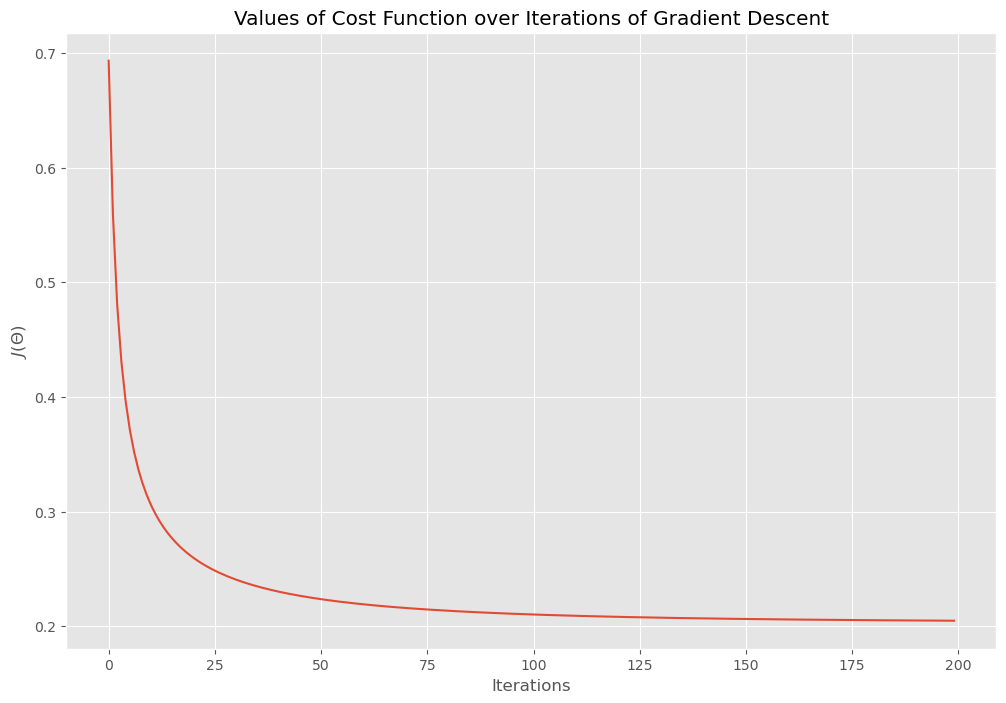

In [16]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over Iterations of Gradient Descent")
plt.show()

### Plotting the decision boundary
---

$h_w(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = w^Tx$

When $h_w(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(w^Tx) \geq 0.5$

$\implies w^Tx \geq 0$ predict class "1" 

Hence, $w_1 + w_2x_2 + w_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(w_1+w_2x_2)}{w_3}$

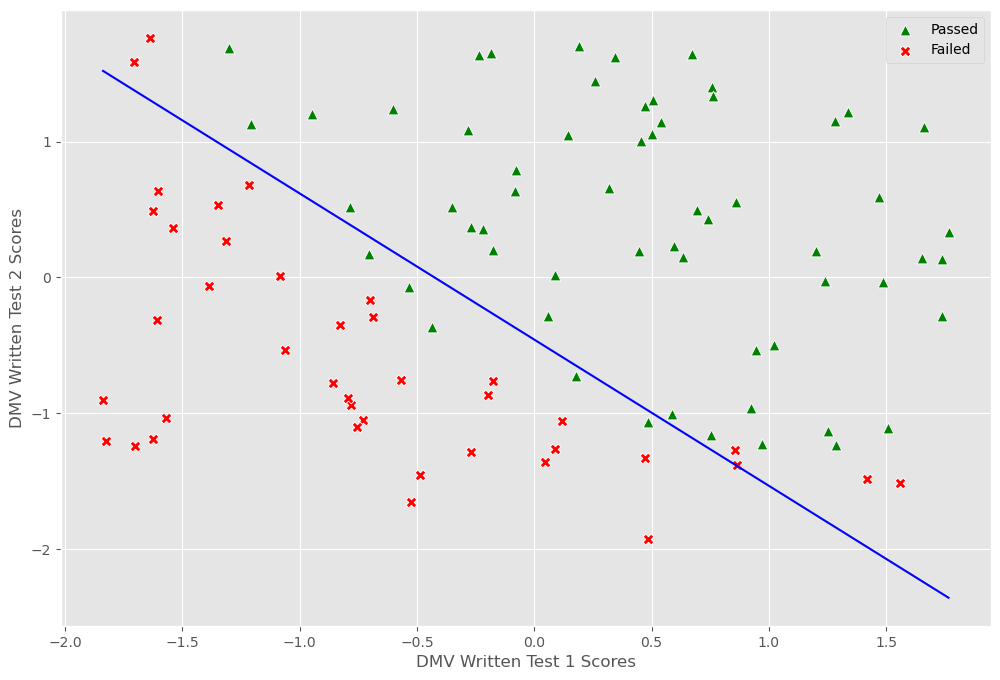

In [17]:
ax=sns.scatterplot(x = X[passed[:, 0], 1],
                   y = X[passed[:, 0], 2],
                   marker = '^',
                   color='green',
                   s=60)
sns.scatterplot(x = X[failed[:, 0], 1],
                y = X[failed[:, 0], 2],
                marker = "X",
                color='red',
                s=60)
ax.legend(['Passed', 'Failed'])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(w[0] + w [1] *x_boundary) / w [2]
sns.lineplot(x=x_boundary,y=y_boundary,color="blue")
plt.show()

###  Predictions using the optimized w values
---

$h_w(x) = xw$

In [18]:
def predict(w, x):
    results = x.dot (w)
    return results >0

In [19]:
p = predict (w, X)
print("Training Accuracy:", sum(p==y) [0],"%")

Training Accuracy: 89 %


In [20]:
test = np.array([50, 79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = sigmoid(test.dot(w))
print ("A person who scores 50 and 79 on their DMV written tests have a", np.round(probability [0], 2), "probability of passing")

A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing
